# Rephetio DWPCs: compare hetmech values with Cypher values

In [1]:
import pathlib

import pandas

In [2]:
commit = 'ef5f7a6b76b6a01499d65b95e3d7ca93ac5aba57'
url = f'https://github.com/dhimmel/learn/raw/{commit}/all-features/data/matrix/dwpc.tsv.bz2'
cypher_df = (
    pandas.read_table(url)
    .query("hetnet == 'rephetio-v2.0'")
    .drop('hetnet', axis='columns')
    .melt(id_vars=['compound_id', 'disease_id'], var_name='metapath', value_name='cypher_dwpc')
)
cypher_df.head(2)

,compound_id,disease_id,metapath,cypher_dwpc
0,DB00014,DOID:10283,CbG<rG<rGaD,0.0
1,DB00014,DOID:10534,CbG<rG<rGaD,0.0


In [3]:
path = pathlib.Path('data/rephetio-DWPCs-hetmech.tsv.xz')
matrix_df = (
    pandas.read_table(path, compression='xz')
    .rename(columns={'compound': 'compound_id', 'disease': 'disease_id'})
    .melt(id_vars=['compound_id', 'disease_id'], var_name='metapath', value_name='matrix_dwpc')
)
matrix_df.head(2)

,compound_id,disease_id,metapath,matrix_dwpc
0,DB00014,DOID:0050156,CbGaD,0.0
1,DB00014,DOID:0050425,CbGaD,0.0


In [4]:
compare_df = cypher_df.merge(matrix_df)
compare_df['difference'] = (compare_df.cypher_dwpc - compare_df.matrix_dwpc).abs()
compare_df.head(2)

,compound_id,disease_id,metapath,cypher_dwpc,matrix_dwpc,difference
0,DB00014,DOID:10283,CbG<rG<rGaD,0.0,0.0,0.0
1,DB00014,DOID:10534,CbG<rG<rGaD,0.0,0.0,0.0


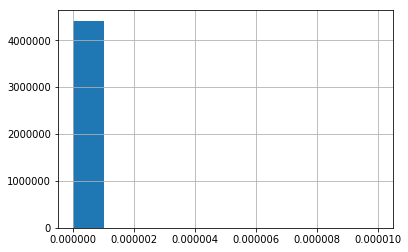

In [5]:
%matplotlib inline
compare_df.difference.hist();

In [6]:
max(compare_df['difference'])

1.0000000000037756e-05

In [7]:
compare_df.sort_values('difference', ascending=False).head(20)

,compound_id,disease_id,metapath,cypher_dwpc,matrix_dwpc,difference
3798851,DB00570,DOID:1612,CuGdAdGdD,0.18177,0.18176,0.00001
2290157,DB00996,DOID:1826,CpDpCtD,0.13992,0.13991,0.00001
1519936,DB00970,DOID:1909,CdGeAeGdD,0.20717,0.20718,0.00001
209375,DB00755,DOID:1192,CbGbCtD,0.15368,0.15369,0.00001
4306626,DB01204,DOID:1612,CuGuCdGaD,0.14017,0.14016,0.00001
3978779,DB08865,DOID:8893,CuGeAeGdD,0.24277,0.24278,0.00001
3211271,DB00997,DOID:1192,CtDlAlDrD,0.13528,0.13529,0.00001
4270358,DB00445,DOID:2531,CuGuAeGuD,0.13237,0.13236,0.00001
1537992,DB00694,DOID:2531,CdGeAuGdD,0.14663,0.14664,0.00001
4108403,DB00570,DOID:2531,CuGpBPpGdD,0.15948,0.15949,0.00001


In [8]:
# Metapaths
compare_df.query("difference > 0.01").metapath.value_counts()

Series([], Name: metapath, dtype: int64)